<center>
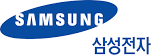<br>
</center>

# 삼성전자 주가 예측

삼성전자의 주가를 예측해보자. 이번 블로깅의 전반적인 내용은 '이것이 데이터 분석이자 with Python'책의 Chapter 3-2. 비트코인 시세 예측하기 부분을 응용한 것이며 데이터 수집 부분을 제외한 전반적인 코드는 동일하다. 코드에 대한 자세한 기술적인 설명은 다음을 참고한다. 

 - [이것이 데이터 분석이다 with Python: 비트코인 시세 예측](https://unfinishedgod.netlify.app/2021/04/19/python-%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8-%EC%A3%BC%EA%B0%80-%EC%98%88%EC%B8%A1-study/)

### Step 0 데이터 수집: Yahoo Finance 데이터 불러오기

우선 삼성전자 주가의 데이터를 Yahoo Finance모듈에서 불러와보자. yfinance모듈을 사용했으며 사용시 데이터의 시작지점은 2019년 1월 부터 2021년 4월 21일까지로 설정 해주었다.또한, 삼성전자의 Ticker의 경우 구글에 '삼성전자 주가'를 검색후 나오는 코드인 005930에 '.KS'를 추가해주어 '005930.KS'를 넣어 주었다. 이중에서 종가(Close)를 가져와 price라고 지정해주고 분석을 시작해보자.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


samsung_df = yf.download('005930.KS',
                      start='2019-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2019-01-02,38750.0
2019-01-03,37600.0
2019-01-04,37450.0
2019-01-07,38750.0
2019-01-08,38100.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


### Step 1 탐색: 시간정보가 포함된 데이터 살펴보기

우선 삼성전자 주가 데이터를 탐색해보자. 다음 코드로 데이터셋을 살펴보면, 삼성전자 주가 데이터는 총 567개의 행으로 이루어진 것을 알 수 있다. 또한 데이터는 결측값 없이 날짜와 가격에 대한 2개의 피쳐로 구성되어 있다. 추가로 먼저 Train/Test set으로 나눌것인데 마지막 날짜 5일을 제외한 나머지를 Train으로 지정 해주고 마지막 날짜 5일을 Test으로 지정 해주었다.

In [3]:
samsung_train_df = samsung_df[:562]
samsung_train_df

,price
day,
2019-01-02,38750.0
2019-01-03,37600.0
2019-01-04,37450.0
2019-01-07,38750.0
2019-01-08,38100.0
...,...
2021-04-07,85600.0
2021-04-08,84700.0
2021-04-09,83600.0


In [4]:
samsung_test_df = samsung_df[562:]
samsung_test_df

,price
day,
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0
2021-04-19,83300.0
2021-04-20,83900.0


#### 시각화

이제 삼성전자의 데이터를 시각화하여 파악해보자. 전반적으로 2019년 초부터 2019년 말까지 올라가는 추세를 보이고 있으나, 코로나의 영향으로 2020년 3월 20일날 역사적인 하락세를 보이는 경향을 볼 수 있다. 그러나 그 이후에 점차 회복을 하더니 6만전자, 7만전자.. 기어코 최대 96000만 전자까지 가는 기염을 토하는 모습을 볼 수 있다.

In [8]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

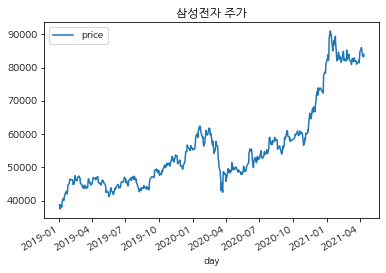

In [9]:
samsung_train_df.plot()
plt.title("삼성전자 주가")
plt.show()

In [39]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(samsung_train_df.price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

/home/owen/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  546
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4555.129
Method:                       css-mle   S.D. of innovations           1011.839
Date:                Tue, 20 Apr 2021   AIC                           9122.258
Time:                        22:46:43   BIC                           9148.074
Sample:                             1   HQIC                          9132.350
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.0742     44.295      1.763      0.078      -8.742     164.891
ar.L1.D.y     -1.5663      0.019    -81.913      0.000      -1.604      -1.529
ar.L2.D.y     -0.9463      0.016    -57.851      0.0

/home/owen/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
